# EXERCICIS D'ALGORITMES DE CLASSIFICACIÓ

### Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.



### Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.



### Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.



### Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.



### Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

# PLANTEAMIENTO DEL EJERCICIO

Para resolver este ejercicio, responderé a los ejercicios de forma combinada. Iré indicando a lo largo de la tarea los distintos pasos que voy siguiendo.

## 1. Carga de los datos y visualización inicial

En esta primera fase, procedo a cargar los datos y a visualizar la base de datos. Como es una parte opcional que no se pedía en el ejercicio, he dejado algunas líneas de código sin ejecutar para tal de no sobrecargar la entrega. 

Cargamos los datos:

In [1]:
import pandas as pd

wines = pd.read_csv("wineData.txt", sep=',',
                  names=["CLASS","Alcohol","Malicacid", "Ash", "Alcalinityash","Magnesium","Totalphenols","Flavanoids",
                        "Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","OD280/OD315","Proline"])
wines.head()

,CLASS,Alcohol,Malicacid,Ash,Alcalinityash,Magnesium,Totalphenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASS                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malicacid             178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinityash         178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Totalphenols          178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Observamos que hay un total de 14 columnas. La primera (CLASS) corresponde a los grupos que queremos predecir. En todos los casos son variables numéricas y continuas. Vamos a representarlo gráficamente para facilitar la comprensión de nuestra base de datos:

<AxesSubplot:>

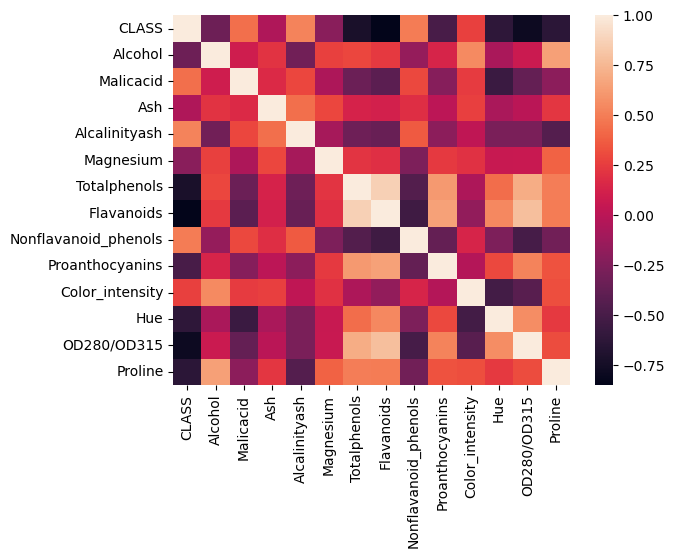

In [3]:
import seaborn as sns

wine_corr = wines.corr()
sns.heatmap(wine_corr)

In [8]:
#wines.plot.scatter(x="CLASS", y="Flavanoids")

El plot de correlaciones es interesante, pero con la variable "CLASS" no es muy representativo, ya que aparecerán como altamente correlacionadas aquellas variables que tengan valores muy altos o bajos en el primer grupo de class y en los siguientes grupos se reduzcan / aumenten progresivamente (ver linea de código no ejecutada). Así que podemos buscar otras maneras que nos permitan entender algo mejor qué es lo que tenemos:

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

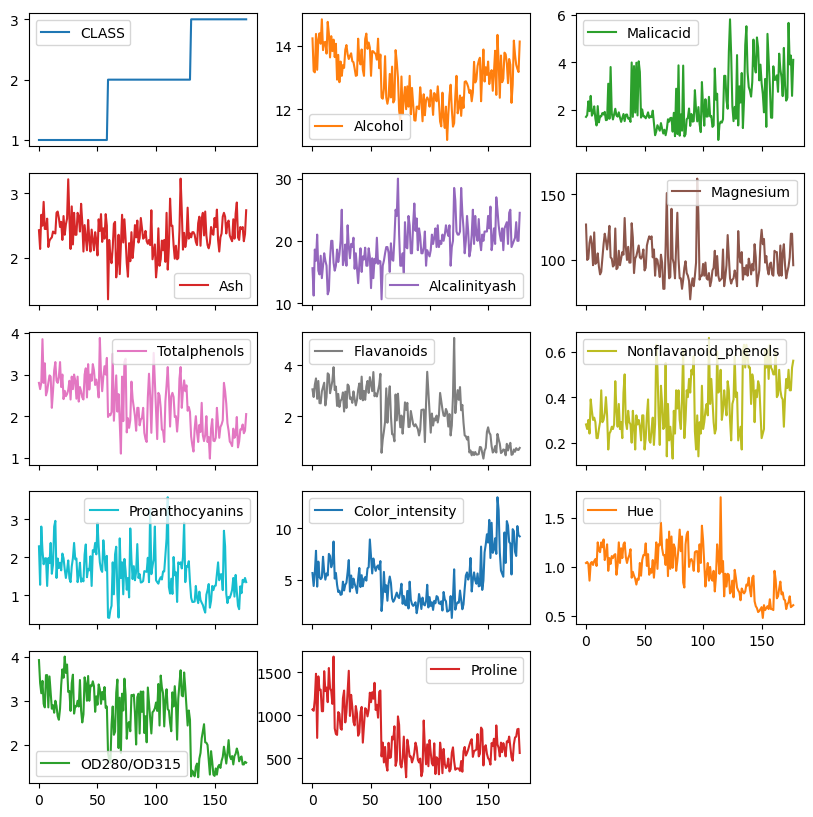

In [4]:
wines.plot(subplots=True, layout=(5,3), figsize=(10, 10))

In [10]:
#wines.plot(x="CLASS",subplots=True, layout=(5,3), figsize=(10, 10))

En este caso, visualizamos las variables a lo largo de las 178 muestras. Observamos ruido y variabilidad en la mayoría de columnas. Si queremos fijar en el eje x la variable CLASS podemos hacerlo (línea de código no ejecutada). Aunque da algo más de información, podemos mejorarlo. Procedo a sacar boxplots para cada una de las variables, haciendo uso de códigos públicos en internet:

IndexError: index 13 is out of bounds for axis 0 with size 13

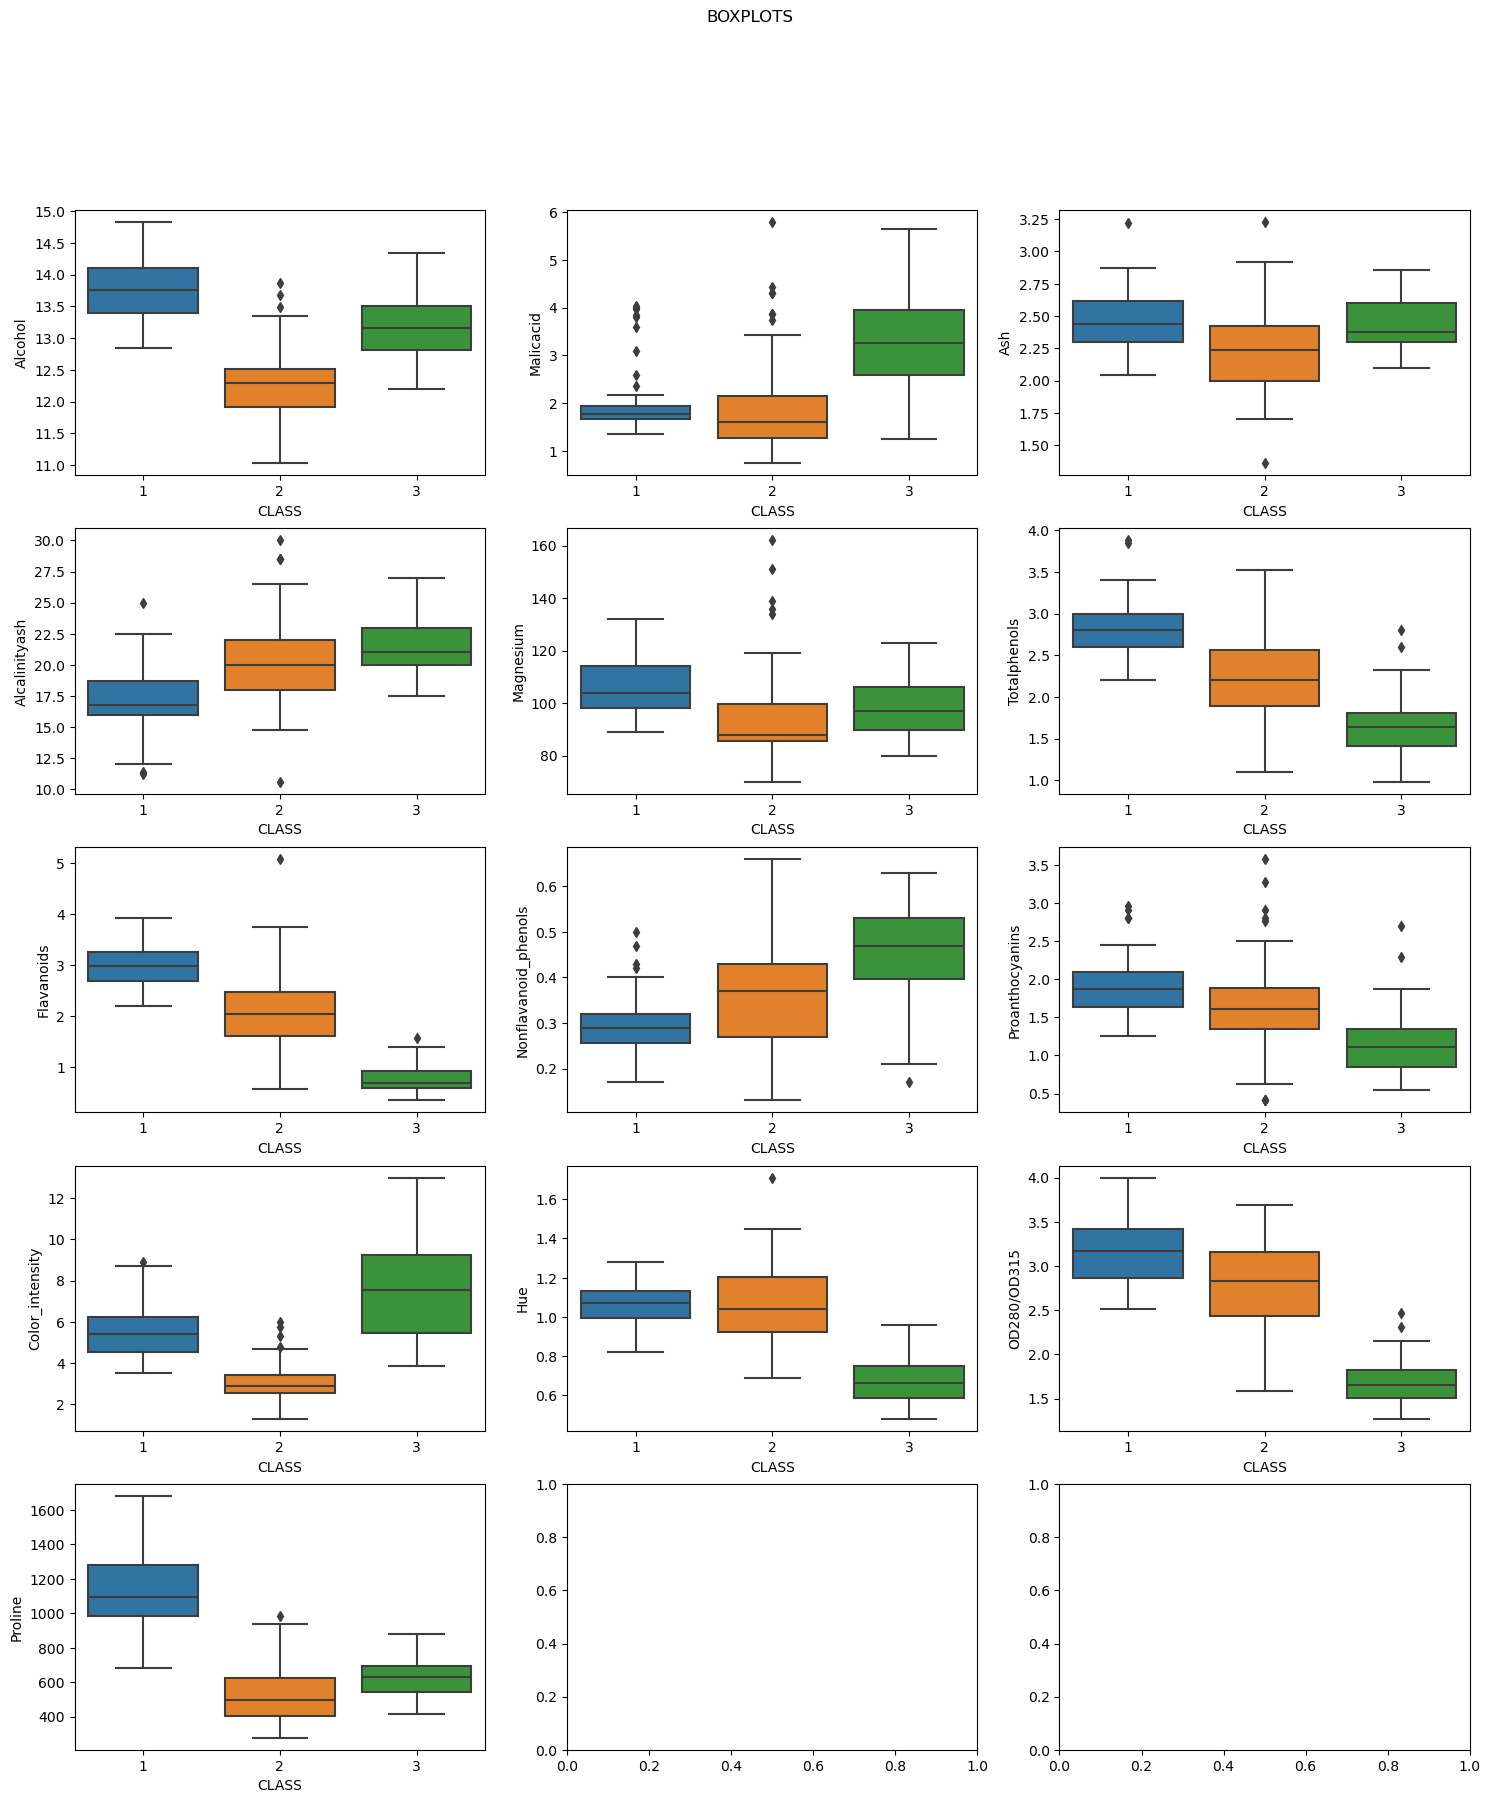

In [5]:
y_labels = wines.columns[1:]

import math

import matplotlib.pyplot as plt

#tamaño de las figuras
ncols = 3
nrows = math.ceil(len(y_labels) / 3)
figsize = (ncols * 6, nrows * 4)

# asignando figuras y plots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
fig.suptitle('BOXPLOTS')

# y_labels index
y_idx = 0

# plots
for axs in axes:
    for ax in axs:
        sns.boxplot(ax=ax, data=wines, x='CLASS', y=y_labels[y_idx])
        ## update y_idx
        y_idx += 1

Ahora si! Observamos que en la mayoría de variables se ven claras diferencias entre al menos dos de las tres clases. En algunos casos, como puede ser la intensidad de color o los fenoles, las diferencias son considerables entre los 3 grupos

## Ejercicios 1, 2, 4: Creación de dos modelos

En este apartado, procederé a crear 2 modelos (uno basado en la regresión logística y otro en los árboles de clasificación). Haré uso de la aproximación **train/test**, y compararé su rendimiento usando una matriz de confusión, la accuracy y la AUC. 

En primer lugar, procedo a dividir los datos en los subsets train y test:


In [6]:
#separación de los datos
Xcols = ["Alcohol","Malicacid", "Ash", "Alcalinityash","Magnesium","Totalphenols","Flavanoids",
                        "Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","OD280/OD315","Proline"]
X = wines[Xcols] #Todas las variables predictoras
y = wines.CLASS #Variable dependiente

print(X) #Compruebo que todo está bien

     Alcohol  Malicacid   Ash  Alcalinityash  Magnesium  Totalphenols  \
0      14.23       1.71  2.43           15.6        127          2.80   
1      13.20       1.78  2.14           11.2        100          2.65   
2      13.16       2.36  2.67           18.6        101          2.80   
3      14.37       1.95  2.50           16.8        113          3.85   
4      13.24       2.59  2.87           21.0        118          2.80   
..       ...        ...   ...            ...        ...           ...   
173    13.71       5.65  2.45           20.5         95          1.68   
174    13.40       3.91  2.48           23.0        102          1.80   
175    13.27       4.28  2.26           20.0        120          1.59   
176    13.17       2.59  2.37           20.0        120          1.65   
177    14.13       4.10  2.74           24.5         96          2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28     

In [7]:
# split X y en los sets de training y testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Empiezo con el primer modelo; en mi caso he decidido comenzar por una **REGRESIÓN LOGÍSTICA**:

In [8]:

from sklearn.linear_model import LogisticRegression

# Modelo. OJO! Fijo el máximo de iteraciones en 10.000 porque con 100 (default) no convergía. También se fija un random_state para
#hacerlo reproducible

logreg = LogisticRegression(random_state=42, max_iter=10000)

# fit del modelo con los datos
logreg.fit(X_train, y_train)
#predicción
y_pred = logreg.predict(X_test)

Ahora vamos a ver qué tal lo hace! En primer lugar, miraremos la matriz de confusión:

In [9]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 1, 11,  1],
       [ 0,  1, 16]], dtype=int64)

Los resultados son bastante buenos. Para facilitar la visualización, utilizo la siguiente opción:

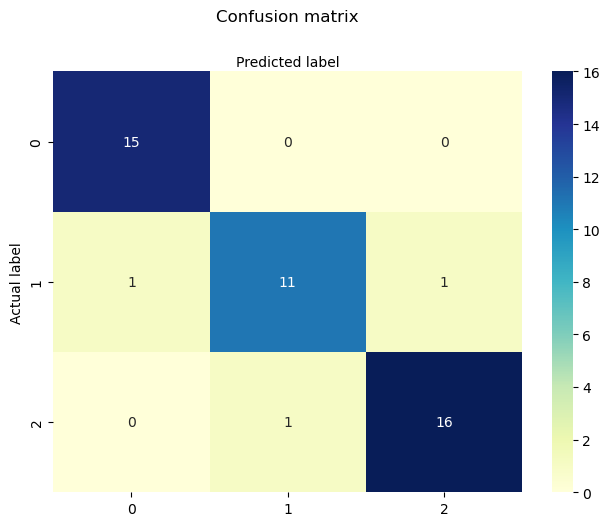

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

¿Qué es lo que podemos ver aquí? En el caso de la Clase 0, el modelo predice de manera exitosa todos las entradas de testeo. En el caso de la Clase 1, el modelo falla en 2/13 casos, prediciendo en un caso Clase 0 (cuando es Clase 1) y en otro caso clase 2 (cuando es Clase 1). En la clase 2, falla solamente en 1/17. El modelo realmente parece bastante bueno. Veamos la accuracy:

In [11]:
#Accuracy

print(round(metrics.accuracy_score(y_test, y_pred),2)) #Redondeo el resultado

0.93


El modelo tiene una precisión del 0.93, un valor bastante alto. Por último, vamos a ver el AUC (número más alto = mej0r modelo):

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg, X, y).mean()

0.961111111111111

Ahora crearé el siguiente modelo, en este caso basado en **ÁRBOLES DE CLASIFICACIÓN**

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42) #fijo random state

# Entreno el modelo
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test)

In [14]:
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[15,  0,  0],
       [ 0, 12,  1],
       [ 0,  4, 13]], dtype=int64)

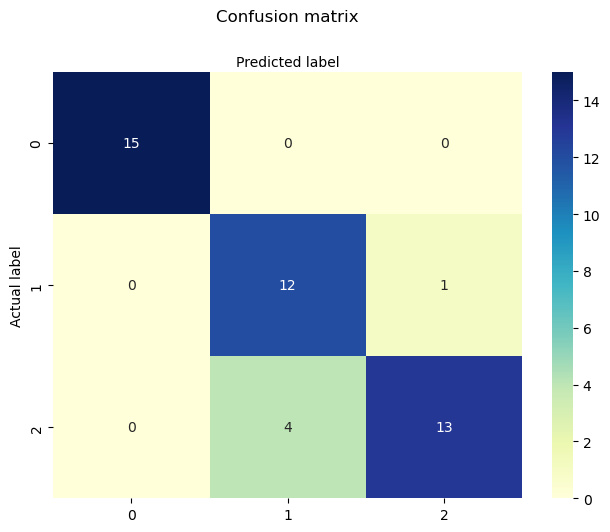

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

En este segundo modelo observamos que el error es mayor a la hora de clasificar registros de la clase 2 (falla 4/17). Veamos las otras métricas:

In [16]:
print(round(metrics.accuracy_score(y_test, y_pred1),2))

0.89


In [17]:
cross_val_score(clf, X, y).mean()

0.8653968253968254

Observamos que la accuracy es algo menor que para el anterior modelo (0.89 vs 0.93); el AUC también es menor. 

## Ejercicios3 y 5

¿Cómo podemos mejorar este segundo modelo? Voy a empezar seleccionando parámetros óptimos. Después también probaré a normalizar los datos para ver el efecto sobre las predicciones. 

Usaré GridSearchCV para buscar los mejores parámetros posibles:

In [18]:
from sklearn.model_selection import GridSearchCV #Esto permite mejorar los parámetros del modelo

# Find the best parameters for the model
parameters = {
    'max_depth': [2,3,5,10,15, 30, 60, 80,100],
    'criterion': ['entropy','gini'],
    'min_samples_leaf':[1,2,3,5,10]
}

gridforest = GridSearchCV(clf, parameters, cv = 5, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_


Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}

In [19]:
clf1 = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=2,criterion='gini')
clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf1.predict(X_test)

cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[15,  0,  0],
       [ 1, 11,  1],
       [ 1,  3, 13]], dtype=int64)

Observamos en la matriz de confusión que el modelo no parece mejorar mucho. Probaré a normalizar los datos; para ello normalizaré solamente las variables X, tanto de train como de test. Primero se hace el fit usando tan solo la parte de train (como si no dispusieramos de los datos del test, para hacerlo más real), y luego transformo ambos datasets.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
xtrain_sc = scaler.transform(X_train)

xtest_sc = scaler.transform(X_test)

In [21]:
clf2 = DecisionTreeClassifier(random_state=42) #fijo random state

# Entreno el modelo
clf2 = clf2.fit(xtrain_sc,y_train)

#Predict the response for test dataset
y_pred3 = clf2.predict(xtest_sc)

In [22]:
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[15,  0,  0],
       [ 0, 12,  1],
       [ 0,  4, 13]], dtype=int64)

Los resultados siguen pareciendo similares; procedo a buscar los mejores parámetros nuevamente

In [23]:
# Find the best parameters for the model
parameters = {
    'max_depth': [2,3,5,10,15, 30, 60, 80,100],
    'criterion': ['entropy','gini'],
    'min_samples_leaf':[1,2,3,5,10]
}

gridforest = GridSearchCV(clf2, parameters, cv = 5, n_jobs = -1, verbose = 1)
gridforest.fit(xtrain_sc, y_train)
gridforest.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}

In [25]:
clf2 = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=2,criterion='gini')
clf2.fit(xtrain_sc,y_train)

#Predict the response for test dataset
y_pred3 = clf2.predict(xtest_sc)

cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[15,  0,  0],
       [ 1, 11,  1],
       [ 1,  3, 13]], dtype=int64)

El modelo finalmente no parece mejorar mucho, así que me quedaría con el que he hecho inicialmente basado en la regresión logística.